# Machine Learning Tutorial
October 14, 2016

## Contents

1. General suggestions for assignments

2. Solutions and common mistakes in assignment #1 and assignment #2

3. Math and coding hints for more difficult assignment #3

# General suggestions for assignments

## Overal grading for our class

Our class does not have midterm exams, so your final grade depends on two parts, 50% assginments and 50% final exams.
While assignments have different degree of workloads, some will cover higher weights. For example, assignment #3 is more difficult than previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.


## Weighting for assignments

Future assignments will be added analogously.

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

## Your final grades

Final exam score: $FinalExam$

Final score for ML course: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$ $\times 50\%$ + $FinalExam \times 50\%$

## My suggestions

Assignments are designed for you to have fun learning Machine Learning, and it plays an important role for your final grades, based on my grading so far, here are my suggestions:

+ Please submit your assignments on time.

+ Double check whether you submit the correct assignment ipynb file.

+ Take a look at my comments and feedback individually each time I release the assignment scores.

+ Later I would talk more about some other details and specific suggestions regarding math problems and coding problems based on my grading.


# Common mistakes or problems in assignment #1 and assignment #2

I would first talk about the solutions and some common mistakes/problems. 

# Assignment 1 : Warm Up Exercise

Goal: To learn/review python and ipynb.

Grading results: This one is easier, with average score 94.

# Ex1-Solutions
## Q1: Implement the sorting algorithm

Here I show the bubble sort example

In [1]:
# sorting function (bubble sort)
def sort(values):
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            if(values[i] > values[j]):
                #swap
                tmp = values[i]
                values[i] = values[j]
                values[j] = tmp
    return values

# test function
def test(values):
    sort(values)

    correct = True
    for index in range(1, len(values)):
        if(values[index-1] > values[index]):
            correct = False
        
    print('Correct? ' + str(correct))

In [2]:
import numpy as np
# different random seed
np.random.seed()

N = 8

# test input(1): random array
valuesR = np.random.random([N])
print("Random input array with size 8: ", valuesR)

test(valuesR)
print("After bubble sort: ", valuesR)

# test input(2): manually input with size N=8
valuesM = [-10, 10, 24, 8, 2.8, -0.99, 20, -100]
print("Manually input array with size 8: ", valuesM)
test(valuesM)
print("After bubble sort: ", valuesM)

Random input array with size 8:  [ 0.12982089  0.20631379  0.68009803  0.89329061  0.23701518  0.173342
  0.01141382  0.07097585]
Correct? True
After bubble sort:  [ 0.01141382  0.07097585  0.12982089  0.173342    0.20631379  0.23701518
  0.68009803  0.89329061]
Manually input array with size 8:  [-10, 10, 24, 8, 2.8, -0.99, 20, -100]
Correct? True
After bubble sort:  [-100, -10, -0.99, 2.8, 8, 10, 20, 24]


## Q2: Write down explicit formulas for $w_0$ and $w_1$ in terms of $\mathbf{X}$ and $\mathbf{T}$.

From 
$$
\begin{align}
\frac{\partial L}{\partial w_0} & = 0 \\
\frac{\partial L}{\partial w_1} & = 0
\end{align}
$$

Then we have:
\begin{align}
\sum_{i=1}^{N} -2 X^{(i)} (T^{(i)}-(w_1 X^{(i)} + w_0)) = 0 \\
\sum_{i=1}^{N} -2 (T^{(i)} - (w_1 X^{(i)} + w_0)) = 0
\end{align}

Simplify:

\begin{align}
(\sum_{i=1}^{N} (X^{(i)})^2) w_1 + (\sum_{i=1}^{N} X^{(i)}) w_0 = \sum_{i=1}^{N} X^{(i)} T^{(i)}\\
(\sum_{i=1}^{N} X^{(i)}) w_1 + n w_0 = \sum_{i=1}^{N} T^{(i)}
\end{align}

Then we get:
$$
\begin{align}
w_1 = \frac {n \sum_{i=1}^{N} X^{(i)} T^{(i)} - \sum_{i=1}^{N} X^{(i)} \sum_{i=1}^{N} T^{(i)}} {n \sum_{i=1}^{N} (X^{(i)}) ^ 2 - (\sum_{i=1}^{N} X^{(i)}) ^ 2}\\
w_0 = \frac {1} {n} (\sum_{i=1}^{N} T^{(i)} - w_1 \sum_{i=1}^{N} X^{(i)})
\end{align}
$$



Or we could simplify it more:
Denote the averages of $\mathbf{T}$ and $\mathbf{X}$ as:
$$
\begin{align}
\overline{\mathbf{T}} &= \frac{\sum_{i=1}^{N} \mathbf{T}^{(i)}}{N} \\
\overline{\mathbf{X}} &= \frac{\sum_{i=1}^{N} \mathbf{X}^{(i)}}{N}
\end{align}
$$

We have
$$
\begin{align}
w_1 &= \frac{\sum_{i=1}^{N} \mathbf{X}^{(i)} \left( \mathbf{T} - \overline{\mathbf{T}} \right) }{\sum_{i=1}^{N} \mathbf{X}^{(i)} \left(\mathbf{X}^{(i)} - \overline{\mathbf{X}} \right)} \\
w_0 &= \overline{\mathbf{T}} - w_1 \overline{\mathbf{X}}
\end{align}
$$

# Q2: Code according to the equations above

In [3]:
# line model
import numpy as np

class Line(object):
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
        
    def predict(self, x, noise=0):
        return (x*self.w1 + self.w0 + noise*np.random.normal())

    # Input: data, a 2D array with each (x, t) pair on a row
    # Return: w0 and w1, the intercept and slope of the fitted line
    def learn(self, data):
        data_mean = np.mean(data, axis=0)
        w1 = [0, 0]
        for row in data:
            w1[1] += row[0]*(row[1] - data_mean[1])
            w1[0] += row[0]*(row[0] - data_mean[0])
        w1 = w1[1]/w1[0]
    
        w0 = data_mean[1] - w1*data_mean[0]
    
        return w0, w1

In [4]:
# test
np.random.seed()

w0 = np.asscalar(np.random.random(1))*2-1
w1 = np.asscalar(np.random.random(1))*2-1

line = Line(w0, w1)

N = 30
noise = 0.04
X = np.random.random([N])
T = []
for x in X:
    T.append(np.sum(line.predict(x, noise)))
T = np.array(T)    

data = np.array([X, T]).transpose()

w0_fit, w1_fit = line.learn(data)

line_fit = Line(w0_fit, w1_fit)

print('truth:   ' + str(w0) + ' ' + str(w1))
print('predict: ' + str(w0_fit) + ' ' + str(w1_fit))

truth:   0.23091654511873982 -0.299117214043213
predict: 0.234539586105 -0.307834771478


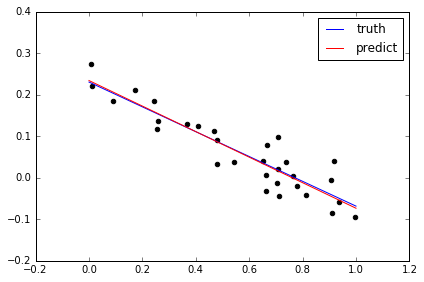

In [5]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], color='black', marker='o')

X_endpoints = [0, 1]
Y_truth, Y_fit = [], []
for x in X_endpoints:
    Y_truth.append(line.predict(x))
    Y_fit.append(line_fit.predict(x))
    
plt.plot(X_endpoints, Y_truth, color='blue', label='truth')
plt.plot(X_endpoints, Y_fit, color='red', label='predict')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Assignmnet 2: Linear Perception

This one is a bit difficult than previous one, with average score 86.

# Q1: Decision boundary for linear perceptron

In [6]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [7]:
import pandas as pd

#data_src = '../datasets/iris/iris.data'
data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


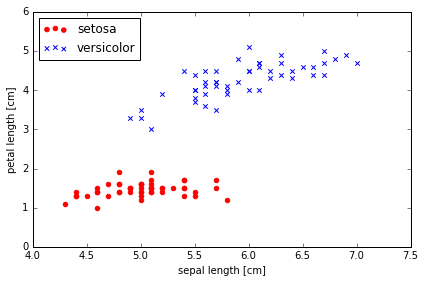

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn = ppn.fit(X, y)

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

Decision boundary, $wx^T = 0$. i.e.
$$
    w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0
$$
So, we could write x2_interval in terms of x1_interval:
$$
    x_{2} = \frac{ -(w_{0} + w_{1}x_{1}) }{ w_{2} }
$$

In [11]:
#Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

# Analytically computation
# Based on the relationship: w[0] + w[1]*x1 + w[2]*x2 = 0 

def plot_decision_boundary(X, y, classifier):    
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    w = classifier.w_;
    x2_interval = [-(w[0]+w[1]*x1_interval[0])/w[2], -(w[0]+w[1]*x1_interval[1])/w[2]]
    
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

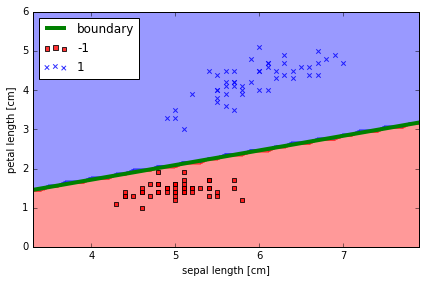

In [12]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Q2: Implement partial_fit
We are going to do that for this exercise to study the behavior of stochastic gradient descent.

In [13]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            self.cost_=[]
            
        """
        The if condition and for loop was deleted, because the gradient is 
        calculated using the whole minibatch, instead of using a for loop to
        calculated the gradients for individual samples.
        """
        self.cost_.append(self._update_weights(X, y))
        return self
    
    def partial_fit_each(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            self.cost_=[]
            
        self.cost_.append(self._update_weights_each(X, y))
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, X, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(X)
        error = (target - output)
        #minibatch updating
        self.w_[1:] += self.eta * X.T.dot(error) 
        self.w_[0] += self.eta * sum(error)
        cost = 0.5 * np.mean(error**2)
        return cost
    
    def _update_weights_each(self, X, target):
        cost = 0
        
        #update for each sample
        for xi, yi in zip(X, target):
            output = self.net_input(xi)
            error = (yi - output)
            self.w_[1:] += self.eta * xi.dot(error)
            self.w_[0] += self.eta * error
            cost += 0.5 * error**2
            
        return cost/len(target)
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [14]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Mini-batch updating
Instead of incrementally update the weights for each sample within a mini batch, weights should be updated at the end of mini batch.
If not, the updating policy will be the same with a mini-batch size of 1, which is the case of traditional SGD.
Therefore, we need to change the _update_weights function so that the weights are updated at the end of the mini-batch.

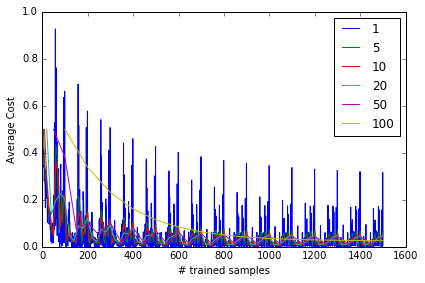

In [15]:
iterations = 15

# Change batch_sizes for observation
batch_sizes = [1, 5, 10, 20, 50, 100]
#batch_sizes = [1, 100]
#batch_sizes = [10, 100]
#batch_sizes = [50 ,100]

for batch_size in batch_sizes:
    ada = AdalineSGD(n_iter=0, eta=0.01, random_state=1)
    for iteration in range(iterations):
        num_batches = np.ceil(y.ravel().shape[0]/batch_size).astype(int)
        for batch_index in range(num_batches):
            start_index = batch_index*batch_size
            end_index = start_index + batch_size
            ada.partial_fit(X_std[start_index:end_index, :], y[start_index:end_index])
    plt.plot([batch_size * x for x in range(1, len(ada.cost_) + 1)], ada.cost_, label=str(batch_size))

if len(batch_sizes) > 0: 
    plt.xlabel('# trained samples')
    plt.ylabel('Average Cost')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# *Common mistake #1* 
## Update for each sample

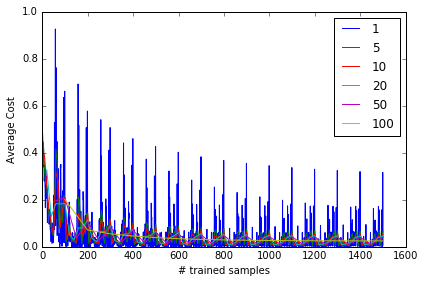

In [16]:
iterations = 15

# Change batch_sizes for observation
batch_sizes = [1, 5, 10, 20, 50, 100]
#batch_sizes = [1, 100]
#batch_sizes = [10, 100]
#batch_sizes = [50 ,100]

for batch_size in batch_sizes:
    ada = AdalineSGD(n_iter=0, eta=0.01, random_state=1)
    for iteration in range(iterations):
        num_batches = np.ceil(y.ravel().shape[0]/batch_size).astype(int)
        for batch_index in range(num_batches):
            start_index = batch_index*batch_size
            end_index = start_index + batch_size
            ada.partial_fit_each(X_std[start_index:end_index, :], y[start_index:end_index])
    plt.plot([batch_size * x for x in range(1, len(ada.cost_) + 1)], ada.cost_, label=str(batch_size))

if len(batch_sizes) > 0: 
    plt.xlabel('# trained samples')
    plt.ylabel('Average Cost')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

What differences do you notice between the two versions of the graph
* mini-batch update versus per-sample update

What explains the different curves for different mini-batch sizes?

# *Common mistake #2* 
## Concept misunderstanding
Quite some students transforms the concept "weights should be updated at the end of mini batch" to "update the weights only for the *last* elements in the batch".

In [ ]:
# which bring code to be like this

for xi, target in zip(X, y):
    output = self.net_input(xi)
    error = (target - output)
    cost.append(0.5 * error**2)
    
#only update for the *last* sample
self._update_weights(X[-1], y[-1])

avg_cost = sum(cost) / len(y)
self.cost_.append(avg_cost) 


# Observation
<p>1. For a specific batch size, as number of train examples increases, the avaerage cost decreases, as the model is refined during the training process.</p>

<p>2. For smaller batch sizes, like 1, 5, 10, 20, the average costs tend to change rapidly at the begining, and keeps fluctuating when the number of examples increase. In contrast, for larger batch sizes like 50, 100, as it contains for samples for updating, the curves are relatively smooth and fluctuate less. </p>

# Hints for Assignment 3: Basic Classifiers

# Q1: RBF Kernel
## Taylor series expansion

$$
e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} = ?
$$

Recall (from calculus) that the Taylor series expansion of the exp function is:
$$
e^z = \sum_{k=0}^\infty \frac{z^k}{k!}
$$

[Wiki: Taylor series](https://en.wikipedia.org/wiki/Taylor_series)

### Polynomial kernel of degree $q$
$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$

Example for $d=2$ and $q=2$
$$
\begin{align}
K\left(\mathbf{x}, \mathbf{y}\right) &= \left( x_1y_1 + x_2y_2 + 1 \right)^2 \\
&= 1 + 2x_1y_1 + 2x_2y_2 + 2x_1x_2y_1y_2 + x_1^2y_1^2 + x_2^2y_2^2 
\end{align}
$$
, which corresponds to the following kernel function:
$$
\phi(x, y) = \left[1, \sqrt{2}x, \sqrt{2}y, \sqrt{2}xy, x^2, y^2 \right]^T
$$

<font color = 'blue'>
For this question, find $\phi$ for the RBF kernel.
</font>

# Q2: Kernel SVM complexity

Complexity of kernel SVM depends on the choice of kernel, in this question, you could just give an approximate description for the complexity analysis for each type.

For example, what kind of output space would each type of kernel project to? And thus how would the parameter complexity (number of parameters) relate to it?

## Reading week

The following might help:
* the corresponding book chapters
* the [parametric versus non-parametric models](http://nbviewer.jupyter.org/github/1iyiwei/pyml/blob/master/code/ch03/ch03.ipynb#Parametric-versus-non-parametric-models) part of the slides


# Q3: Gaussian density Bayes

Hint: Maximize $\exp(f)\exp(g)$ is equivalent to maximize which form?

<font color = 'blue'>
Please provide sufficient derivation steps in your answer so that we can know you did not simply copy the final math formulas from the textbooks/slides.
</font>

# Q4: Applied different scikit-learn classifers for hand-written digits


# How to use scikit-learn to do various stuff

# Load data

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

#data and label
X = digits.data 
y = digits.target

print(X.shape)
print(X.shape[0])
print(X.shape[1])
print(y.shape)

(1797, 64)
1797
64
(1797,)


# Visualize data

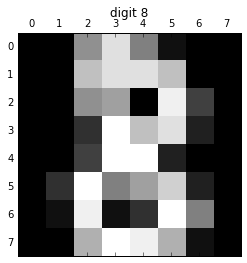

In [18]:
import pylab as pl

index = 8
pl.gray()
pl.matshow(digits.images[index])
pl.title('digit ' + str(digits.target[index]))
pl.show()

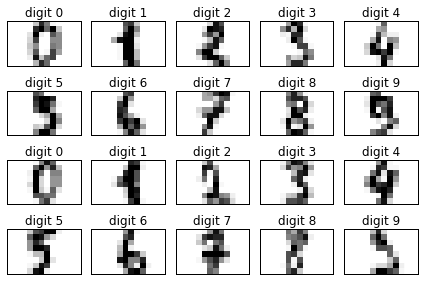

In [19]:
import matplotlib.pyplot as plt
import pylab as pl

num_rows = 4
num_cols = 5

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Data/Feature scaling

Do we need to do some data/feature scaling, i.e. normalizing the data so that each value falls within 0 to 1?

Hint: When doing SVM experiments, try different kernels, to see the accuary difference with and without data normalization, and think about what cause the difference if any.

# Here I show a concrete example on how to use scikit-learn and look up the documentation.


[Scikit-Learn-Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron_)

And the approach applies to all other classifiers.

# Deadline for Assignment 3: Wednesday October 19 11:55 PM

# And next week is reading week.